<a href="https://colab.research.google.com/github/omniaghazy/Predictive-Maintenance-Dataset-AI4I-2020-/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset


In [205]:
import pandas as pd

In [206]:
df = pd.read_csv("/content/ai4i2020.csv")

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [208]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# description

In [209]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [210]:
df = df.drop(columns =["UDI" ,"Product ID"] )

# Data Transformation

In [211]:
df["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [212]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [213]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)

In [214]:
df.head(19)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False
5,298.1,308.6,1425,41.9,11,0,0,0,0,0,0,False,True
6,298.1,308.6,1558,42.4,14,0,0,0,0,0,0,True,False
7,298.1,308.6,1527,40.2,16,0,0,0,0,0,0,True,False
8,298.3,308.7,1667,28.6,18,0,0,0,0,0,0,False,True
9,298.5,309.0,1741,28.0,21,0,0,0,0,0,0,False,True


In [215]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [217]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [218]:
y_pred = model.predict(X_test)

In [219]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [220]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.00
Confusion Matrix:
[[1939    0]
 [   2   59]]


# **Experts**

In [221]:
import pandas as pd
df = pd.read_csv('ai4i2020.csv')
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

# Finding Patterns

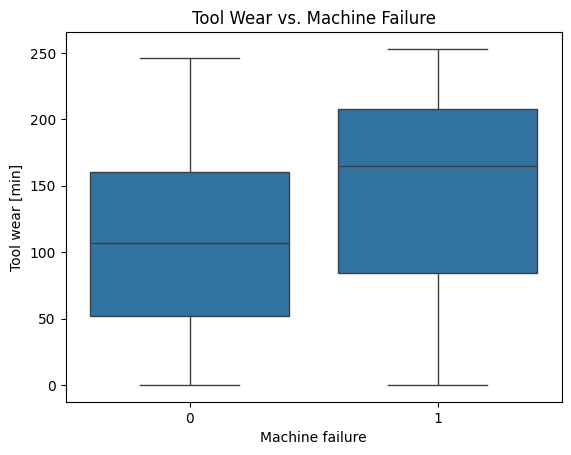

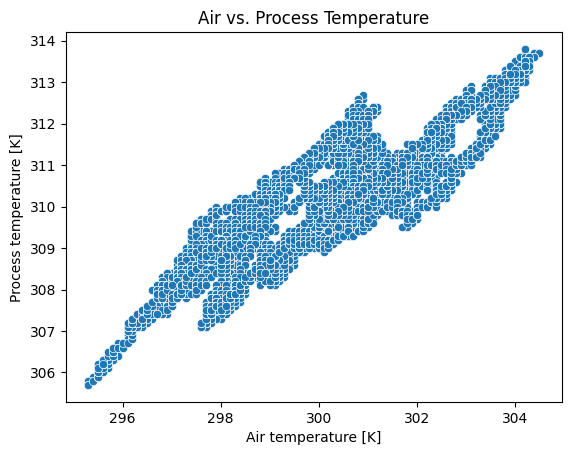

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# علاقة بين تآكل الأداة والعطل
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df)
plt.title('Tool Wear vs. Machine Failure')
plt.show()

# علاقة بين درجات الحرارة
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', data=df)
plt.title('Air vs. Process Temperature')
plt.show()

# Understanding Data Distribution

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64


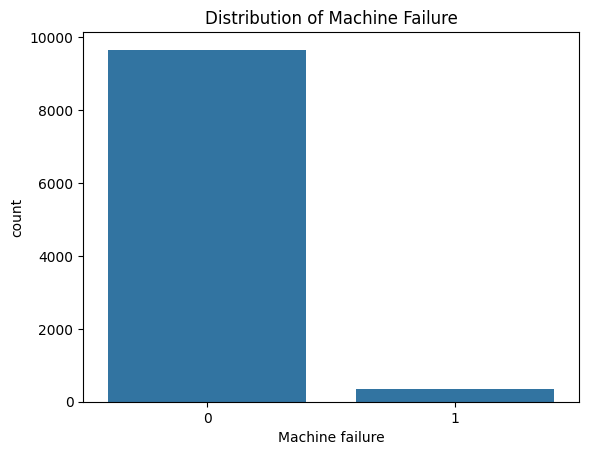

In [223]:
print(df['Machine failure'].value_counts(normalize=True))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure')
plt.show()

# Feature Engineering

In [224]:
df['Heat_Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [225]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Heat_Difference
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190,10.000630
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355,1.001094
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.600000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.300000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.800000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,11.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,12.100000


In [226]:
import numpy as np
df["Rotational Speed [rad/s]"] = (df["Rotational speed [rpm]"] * 2 * np.pi) / 60
df["Power [W]"] = df["Torque [Nm]"] * df["Rotational Speed [rad/s]"]

In [227]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Heat_Difference,Rotational Speed [rad/s],Power [W]
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,162.420340,6951.590560
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,147.445415,6826.722724
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,156.870193,7749.387543
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,150.063409,5927.504659
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,147.445415,5897.816608


In [228]:
numeric_cols = df[df.select_dtypes(include=['number']).columns]

In [229]:
numeric_cols

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Heat_Difference,Rotational Speed [rad/s],Power [W]
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,162.420340,6951.590560
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,147.445415,6826.722724
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,156.870193,7749.387543
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,150.063409,5927.504659
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,147.445415,5897.816608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,167.970487,4955.129373
9996,9997,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,170.902640,5434.703963
9997,9998,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,172.263997,5753.617506
9998,9999,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,147.445415,7151.102638


In [230]:
for col in numeric_cols:
  print(f"{col} variances: {numeric_cols[col].var()}")

UDI variances: 8334166.666666667
Air temperature [K] variances: 4.00103479857988
Process temperature [K] variances: 2.2014672331233736
Rotational speed [rpm] variances: 32142.787047494636
Torque [Nm] variances: 99.37963961586284
Tool wear [min] variances: 4051.850384038408
Machine failure variances: 0.03275406540653668
TWF variances: 0.004579297929793406
HDF variances: 0.011368886888684983
PWF variances: 0.009410691069106449
OSF variances: 0.0097049304930508
RNF variances: 0.001896579657965981
Heat_Difference variances: 1.002188821982204
Rotational Speed [rad/s] variances: 352.4851027858141
Power [W] variances: 1139381.816752362


In [231]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Heat_Difference', 'Rotational Speed [rad/s]', 'Power [W]'],
      dtype='object')

In [232]:
df = df.drop(columns=['UDI', 'Product ID', 'Air temperature [K]',
                      'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
                      'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
                      'Rotational Speed [rad/s]'], inplace=False)

In [233]:
df.head()

,Type,Tool wear [min],Machine failure,Heat_Difference,Power [W]
0,M,0,0,10.5,6951.590560
1,L,3,0,10.5,6826.722724
2,L,5,0,10.4,7749.387543
3,L,7,0,10.4,5927.504659
4,L,9,0,10.5,5897.816608


In [234]:
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

In [235]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming X and y are already defined and contain the data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = ['Type'] # Assuming 'Type' is the only categorical column left

# Create transformers for numerical and categorical features
numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Create a pipeline that first preprocesses the data and then trains the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.98
Confusion Matrix:
[[1928   11]
 [  24   37]]


In [236]:
%pip install imbalanced-learn


In [238]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# X_train and X_test are already preprocessed in cell v8QIYyB7cEzh

# بناء وتدريب الموديل
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# التنبؤ
y_pred_xgb = model_xgb.predict(X_test)

# التقييم
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Type: object

In [ ]:
# بناء وتدريب الموديل
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# التنبؤ على بيانات الاختبار الأصلية
y_pred = model.predict(X_test)

# التقييم
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# XGBoost


In [ ]:
%pip install xgboost

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = ['Type'] # Assuming 'Type' is the only categorical column left

# Create transformers for numerical and categorical features
numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

# Apply preprocessing to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [240]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# X_train and X_test are already preprocessed in cell v8QIYyB7cEzh

# بناء وتدريب الموديل
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# التنبؤ
y_pred_xgb = model_xgb.predict(X_test)

# التقييم
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)

XGBoost Accuracy: 0.97
XGBoost Confusion Matrix:
[[1919   20]
 [  30   31]]
